In [40]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [41]:
weight = 0.5 
bias = 0.9
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9100],
         [0.9200],
         [0.9300],
         [0.9400],
         [0.9500],
         [0.9600],
         [0.9700],
         [0.9800],
         [0.9900]]))

In [42]:
split = int(len(X)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(X_test)

(40, 10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


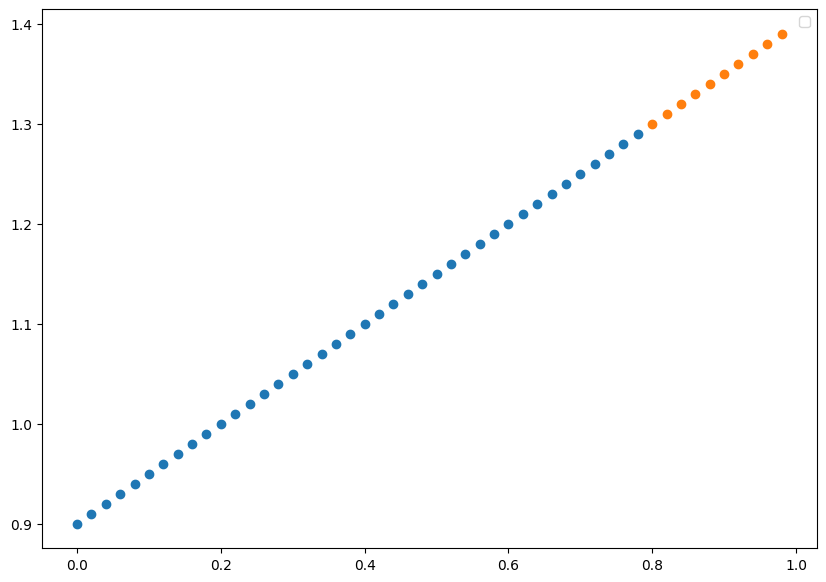

In [43]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                    ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels)
    plt.scatter(test_data,test_labels)
    if predictions is not None:
        plt.scatter(test_data,predictions)
    plt.legend()
    
plot_predictions()

In [44]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self, x):
        return self.weight * x + self.bias



In [45]:
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [46]:
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


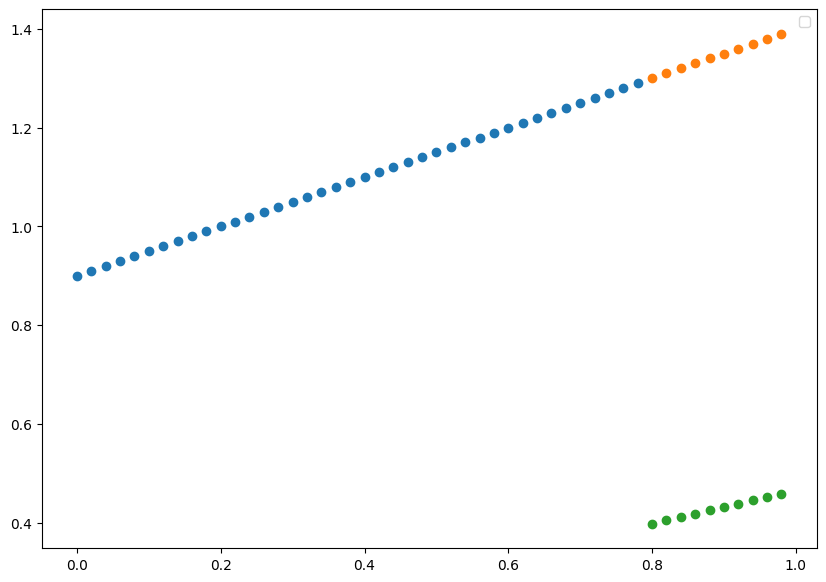

In [47]:
with torch.inference_mode():
    y_preds = model_1(X_test)
plot_predictions(predictions=y_preds)

In [48]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)


In [49]:
torch.manual_seed(42)
epochs = 200
for epoch in range(epochs):
    model_1.train()
    
    y_preds = model_1(X_train)
    loss = loss_fn(y_train,y_preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_preds = model_1(X_test)
        test_loss = loss_fn(test_preds,y_test)
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")
        print(model_1.state_dict())


Epoch : 0 | Loss : 0.8348811864852905 | Test Loss : 0.9030650854110718
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Loss : 0.7196713089942932 | Test Loss : 0.7683551907539368
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Loss : 0.6044613718986511 | Test Loss : 0.6336452960968018
OrderedDict([('weight', tensor([0.4186])), ('bias', tensor([0.3388]))])
Epoch : 30 | Loss : 0.4892515242099762 | Test Loss : 0.4989355206489563
OrderedDict([('weight', tensor([0.4576])), ('bias', tensor([0.4388]))])
Epoch : 40 | Loss : 0.3740416169166565 | Test Loss : 0.3642256259918213
OrderedDict([('weight', tensor([0.4966])), ('bias', tensor([0.5388]))])
Epoch : 50 | Loss : 0.2588317394256592 | Test Loss : 0.22951579093933105
OrderedDict([('weight', tensor([0.5356])), ('bias', tensor([0.6388]))])
Epoch : 60 | Loss : 0.14362187683582306 | Test Loss : 0.09480594098567963
OrderedDict([('weight', tensor([0.5746])), ('bias', tensor([0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


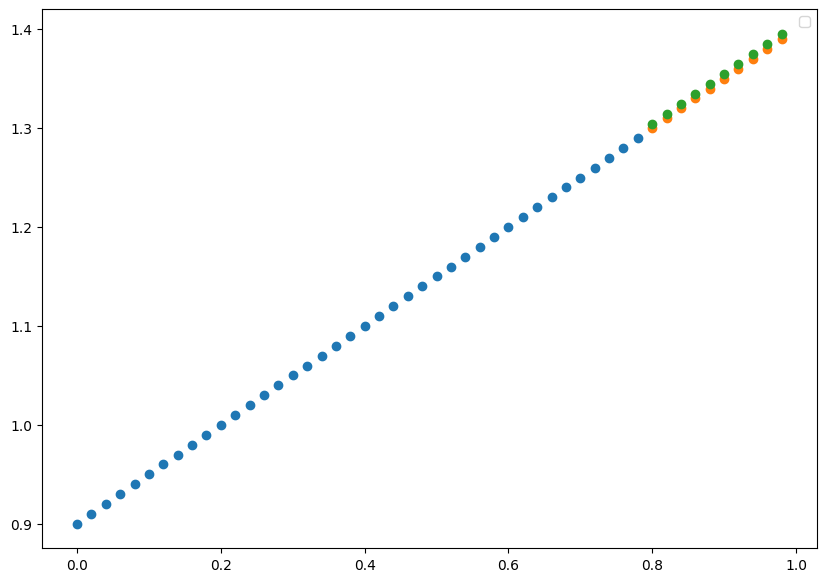

In [50]:
with torch.inference_mode():
        y_preds = model_1(X_test)
plot_predictions(predictions=y_preds)